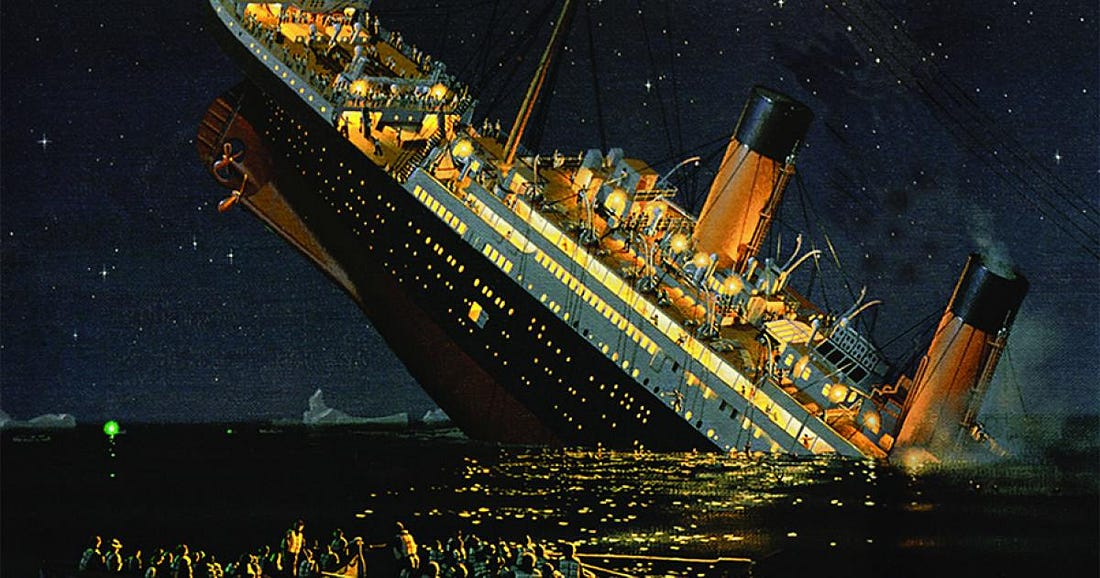

# Get Our Data

1. get it from seaborn
2. mount google drive
3. upload to gdrive
4. other ways

# 1. Get our Data from seaborn

In [ ]:
# Get our Data from seaborn
# import seaborn as sns
# titanic = sns.load_dataset('titanic')

# 2. Mount the whole drive

In [ ]:
# /content/gdrive/My Drive/
# from google.colab import drive

# root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder

# drive.mount('/content/gdrive')


#3. Upload to gdrive

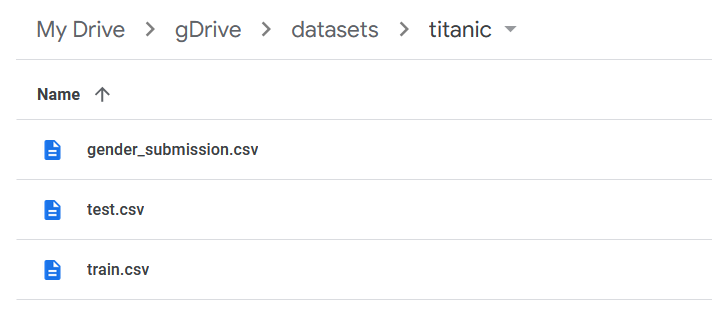

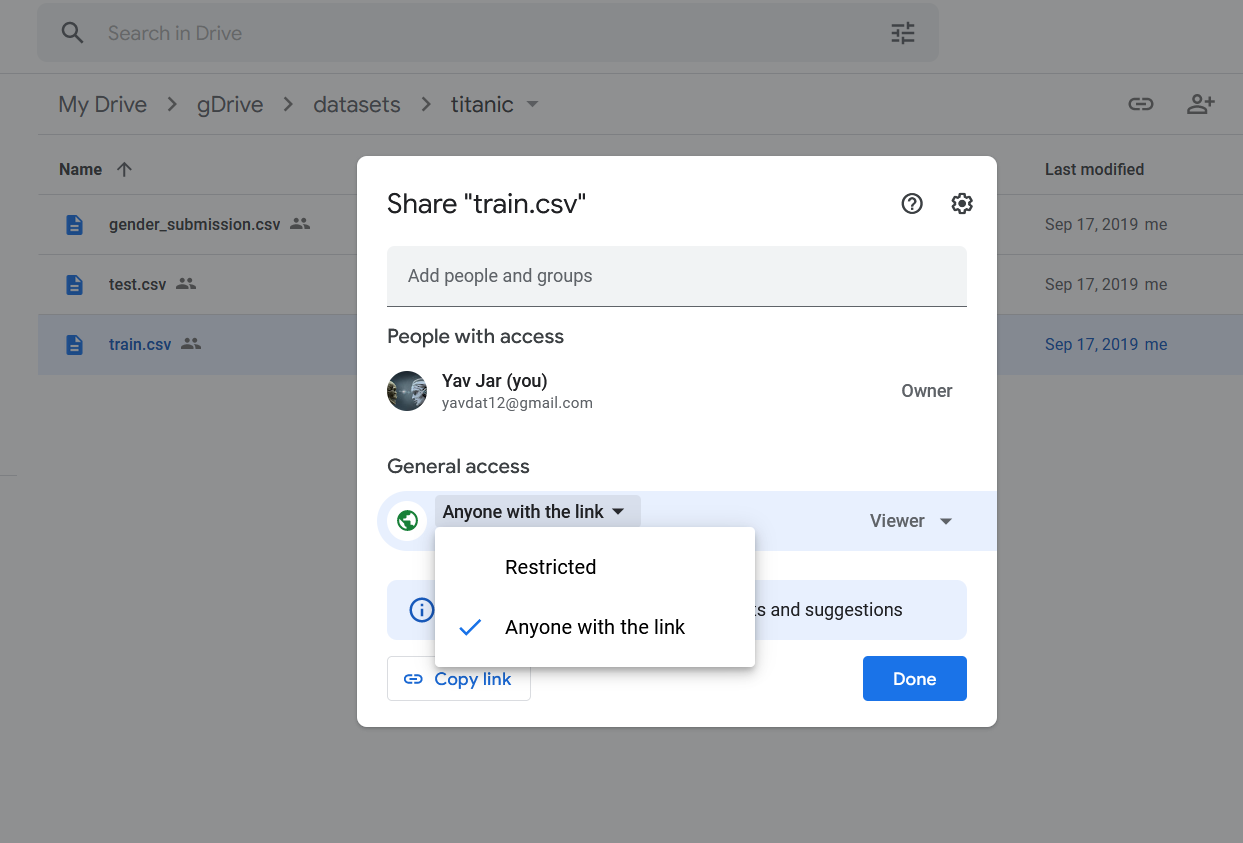

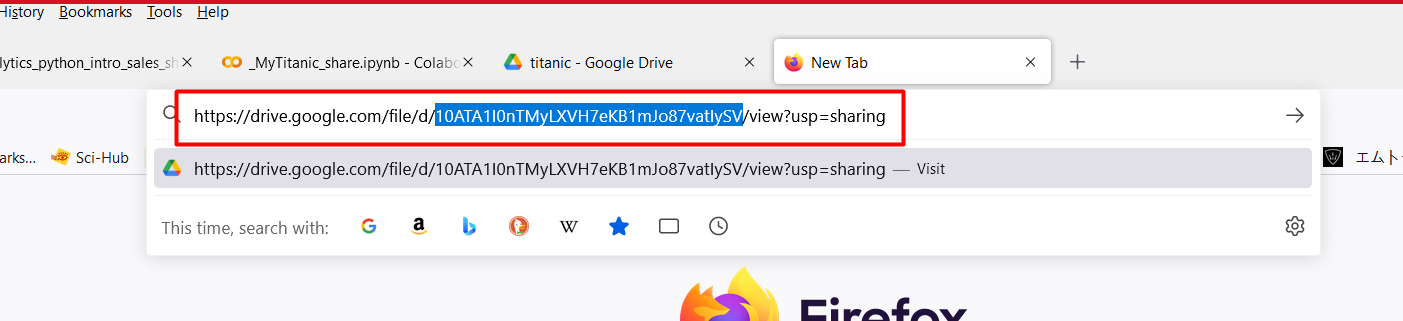

# Uploading specific files from Google Drive to my Google Colab Notebook

https://drive.google.com/file/d/1QHutqAPBI88tAlTu_Lobc5c5buhEAatV/view?usp=sharing

https://drive.google.com/file/d/10ATA1I0nTMyLXVH7eKB1mJo87vatIySV/view?usp=sharing

id of test.csv: 1QHutqAPBI88tAlTu_Lobc5c5buhEAatV <br>
id of train.csv: 10ATA1I0nTMyLXVH7eKB1mJo87vatIySV

In [ ]:
!gdown 10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
!gdown 1QHutqAPBI88tAlTu_Lobc5c5buhEAatV

Downloading...
From: https://drive.google.com/uc?id=10ATA1I0nTMyLXVH7eKB1mJo87vatIySV
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 69.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QHutqAPBI88tAlTu_Lobc5c5buhEAatV
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 35.5MB/s]


# Titanic Data Description

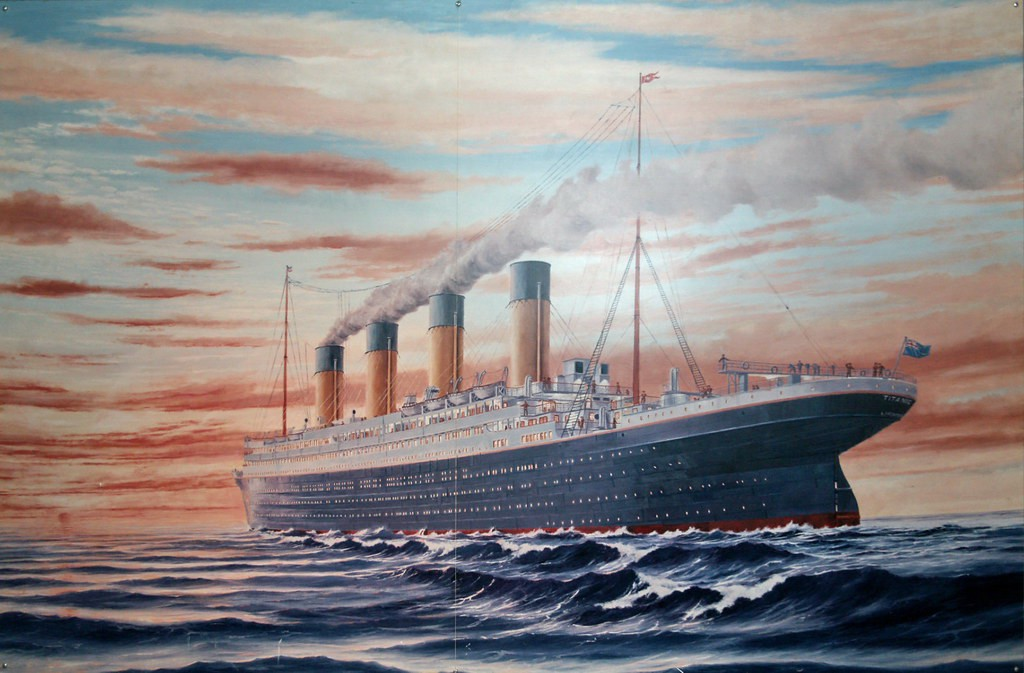



Below is a brief information about each columns of the dataset:

    PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

    Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

    Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

    Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

    Sex: Passenger's sex. It's either Male or Female.

    Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

    SibSp: Number of siblings or spouses travelling with each passenger.
    Parch: Number of parents of children travelling with each passenger.
    Ticket: Ticket number.
    Fare: How much money the passenger has paid for the travel journey.
    Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
    Embarked: Port from where the particular passenger was embarked/boarded (Southampton, Cherbourg, and Queenstown).



In [ ]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Use pandas to read csv file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
# train_df.head()
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



# Name Feature

Let's first extract titles from Name column.


In [ ]:
train_df['Name'][10:20]

10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
Name: Name, dtype: object

Get a more complex feature from the names of the passengers. extract the title from the names of the passengers and ended up with this on the right. these titles were similar:

    Mlle means ‘Mademoiselle’ which is the honorific used to describe someone who would be called ‘Miss’ in France
    Mme means ‘Madame’ which is the honorific used to describe someone who would be called ‘Mrs’ in France
    Ms is the short form for ‘Miss’
    Lady, Countess, Dona are female honorifics of nobility
    Don, Sir, Jonkheer are male honorifics of nobility
    Capt refers to the Captain of the Titanic; Col, Major are military positions; Dr are doctors, Rev is a Reverend who all have special roles in society

list of titles and the chances of survival for each title

    Master — used to denote someone younger
    Miss — young women
    Mr — men
    Mrs — married women
    Royalty — people with fancy titles
    Special — the captain, doctors and reverends who might have been called onto help during the disaster

In [ ]:
!pip install nameparser

In [ ]:
from nameparser import HumanName

In [ ]:
train_df["Title"] = train_df["Name"].apply(lambda x: HumanName(x).title)

train_df["Title"].value_counts()

Mr.                 517
Miss.               182
Mrs.                125
Master.              40
Dr.                   7
Rev.                  6
                      4
Mlle.                 2
Col.                  2
Mme.                  1
Ms.                   1
Lady.                 1
Sir.                  1
Capt.                 1
the Countess. of      1
Name: Title, dtype: int64

In [ ]:
train_df[['Title','Survived']].groupby (['Title'], as_index=False).mean()

,Title,Survived
0,,0.250000
1,Capt.,0.000000
2,Col.,0.500000
3,Dr.,0.428571
4,Lady.,1.000000
5,Master.,0.575000
6,Miss.,0.697802
7,Mlle.,1.000000
8,Mme.,1.000000
9,Mr.,0.156673


<Axes: >

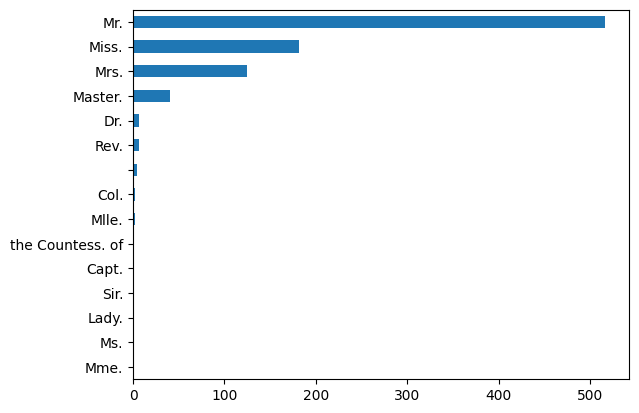

In [ ]:
train_df["Title"].value_counts().sort_values().plot(kind = 'barh')

[Text(0, 0, 'Mr.'),
 Text(1, 0, 'Mrs.'),
 Text(2, 0, 'Miss.'),
 Text(3, 0, 'Master.'),
 Text(4, 0, ''),
 Text(5, 0, 'Rev.'),
 Text(6, 0, 'Dr.'),
 Text(7, 0, 'Mme.'),
 Text(8, 0, 'Ms.'),
 Text(9, 0, 'Lady.'),
 Text(10, 0, 'Sir.'),
 Text(11, 0, 'Mlle.'),
 Text(12, 0, 'Col.'),
 Text(13, 0, 'Capt.'),
 Text(14, 0, 'the Countess. of')]

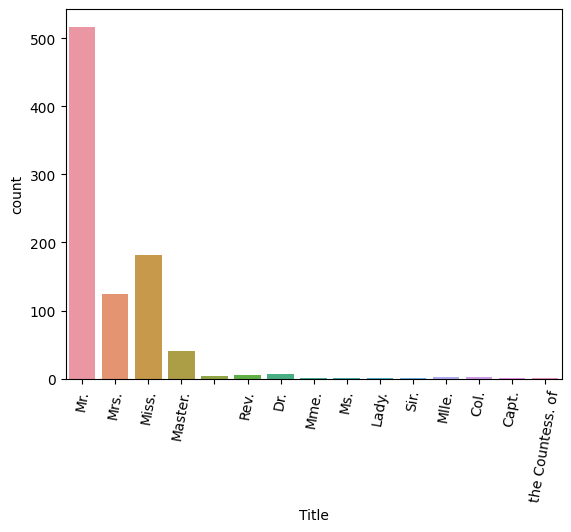

In [ ]:
ax = sns.countplot(data=train_df, x='Title');
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

In [ ]:
# draw a categorical plot onto a FacetGrid
# sns.factorplot(x='Sex', y='Survived', hue='Pclass', size=4, aspect=2, data=train_df)

# Regular Expression

In [ ]:
train_test_data = [train_df, test_df] # combining train_dfand test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


we have added a new column named Title in the train_dfdataset with the Title present in the particular passenger name.

In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40




The number of passengers with each Title is shown above.

We now replace some less common titles with the name "Other".


In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826




After that, we convert the categorical Title values into numeric form.


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) # comodin

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
# train_test_data = train_df
# for dataset in train_test_data:
#     #print(dataset.Embarked.unique())
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1



# Age Feature

We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).

We then create a new column named AgeBand. This categorizes age into 5 different age range.

Pandas cut() function is used to separate the array elements into different bins . The cut function is mainly used to perform statistical analysis on scalar data.


KNN - K Nearest Neighbor <br>
Based on mean and std <br>
Based on median

In [ ]:
# 5 different age range
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int) # Cast a pandas object to a specified dtype

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
print (train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.522936
1   (16.0, 32.0]  0.355705
2   (32.0, 48.0]  0.372549
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


<ipython-input-30-911f43d0ed59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4


# Fare Feature

Replace missing Fare values with the median of Fare.


In [ ]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

In [ ]:
# qcut - Quantile-based discretization function
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


# Map Fare according to FareBand

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


# SibSp & Parch Feature

Combining SibSp & Parch feature, we create a new feature named FamilySize.


In [ ]:
# for dataset in train_test_data:
#     dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

# print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

TypeError: ignored



About data shows that:

    Having FamilySize upto 4 (from 2 to 4) has better survival chance.
    FamilySize = 1, i.e. travelling alone has less survival chance.
    Large FamilySize (size of 5 and above) also have less survival chance.

Let's create a new feature named IsAlone. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.


In [ ]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

AttributeError: ignored

# Factor Analysis

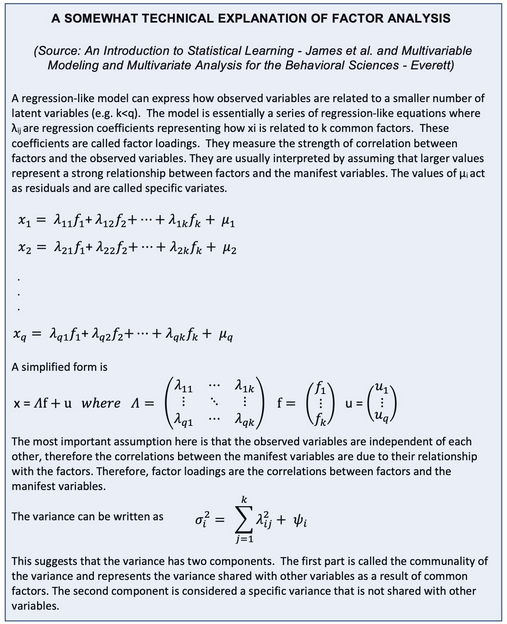

Find the Number of Factors:

It is very important to choose the right number of factors because too few factors produce too many high loadings, while too many factors result in a fragmented model. A description of how to choose the right number of factors is further discussed during the programming section of this chapter.
Rotation:

Rotation is a process that allows analysts to make an FA solution more interpretable.  Any rotation has a goal.  Orthogonal rotations require that factor should not be correlated.  The goal of orthogonal rotation is generalizability and simplicity.  In contrast, oblique rotations allow for correlated factors and their goal is to produce the best fit.
 The rules rotation:

    Interpretation is easier with strong loadings;

    Each row in the factor matrix must contain at least one zero;

    Each column must contain at least k zeros;

    Every pair of columns of the matrix of the matrix should have variables whose loadings are strong in one but disappear in another column;

    If the number of factors is above four, every column pair should have several variables with zero loadings in specific column pairs;

    In every pair of columns few variables should have non-zero loadings.  

Rotation Techniques:

Orthogonal rotation: Major advantage is simplicity - The loadings are correlations between factors and the observed features.

    Varimax: Few large and lots of close to 0 loadings

    Quartimax: Forces a given variable to correlate highly with one factor.  Makes large loadings extremely large and small loadings extremely small.  Maximizes  the variance across the rows of the factor matrix by raising the loadings to the fourth power.

    Oblimax:  When the assumption of homogeneously distributed error cannot be applied, but may be replaced by a principle of maximum kurtosis, according to D.R Saunders (The rationale for an “oblimax” method of transformation in factor analysis)

    Equimax: Attempted improvements on varimax.  The rotation adjusts to the number of factors being rotated. resulting in more uniformly distributed set of factors vs. varimax.  Creates less generic factors.

Oblique rotation: More complex - Factor pattern coefficients are regression coefficients that can be used to create observed features by multiplying the factors with the factor pattern coefficients. Factor structure coefficients are correlation coefficients between factors and observed features.

    Promax: Increases the power of loadings in an orthogonal solution. Computationally less expensive and can be used for large data sets.

    Oblimin: Attempts a simple factor pattern matrix structure by using a parameter that controls the degree of correlation among factors. Finds the best structure while minimizing a.) power loadings and b.) the correlation between factors.  Analysts can set the magnitude of the correlation between the factors.

    Quartimin: Good solution to complex data but produces bias towards highly intercorrelated features when generating factors.  (Read Applied Factor Analysis by R.J Rummel)

https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Drop

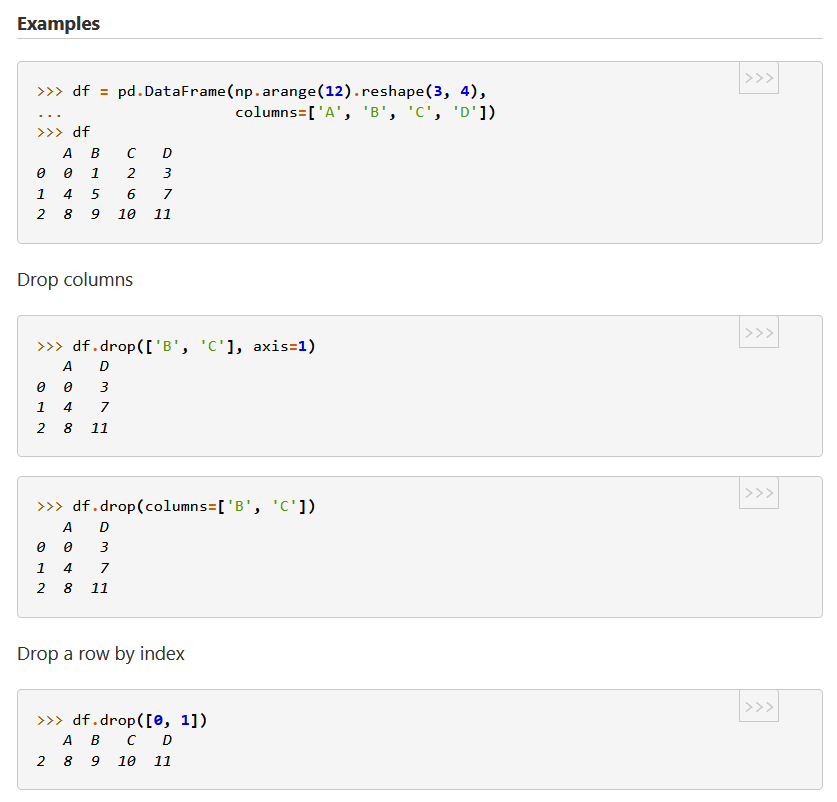

In [ ]:
train_df.columns

In [ ]:
temp = train_df[['Survived','Pclass','Sex','Age','SibSp','Embarked']]
temp.head(1)

In [ ]:

# temp= temp.dropna()
# temp.drop(temp[temp['Embarked'].isnull()].index, inplace = True)
# temp['Embarked'] = temp['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# temp['Sex'] = temp['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

result = temp.columns
temp.head(1)#

In [ ]:
result

In [ ]:
#Subset of the data
# x =train_df[train_df.columns[1:13]]
x = temp

The Kaiser-Meyer-Olkin (KMO) Test is a measure of how suited your data is for Factor Analysis. The test measures sampling adequacy for each variable in the model and for the complete model. The statistic is a measure of the proportion of variance among variables that might be common variance. The lower the proportion, the more suited your data is to Factor Analysis. The test involves the computation of the proportion of variance among the manifest variables.  The KMO values range between 0-1 and a proportion under 0.6 would suggest that the dataset is inappropriate for factor analysis.  Our data is still appropriate with the KMO test at 0.57.

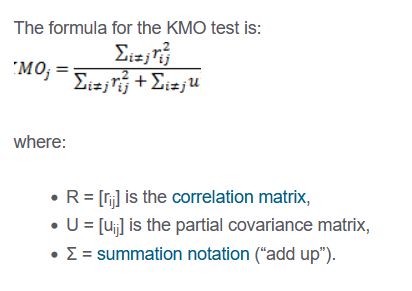

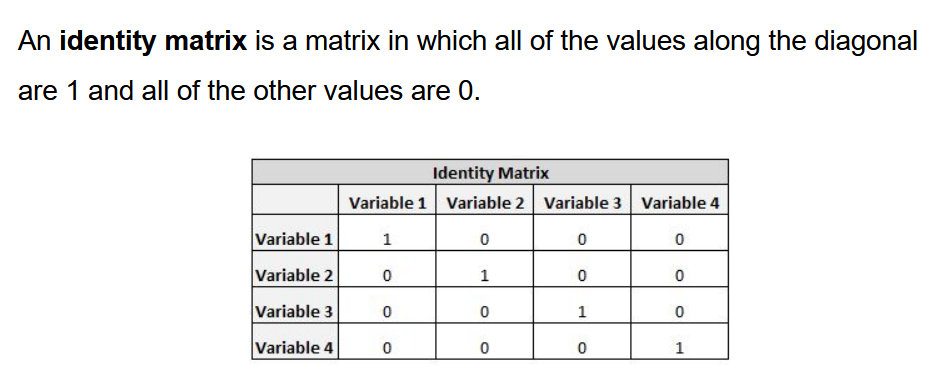

# Bartlett's test of sphericity

Bartlett’s Test of Sphericity compares an observed correlation matrix to the identity matrix. Essentially it checks to see if there is a certain redundancy between the variables that we can summarize with a few number of factors.

The null hypothesis of the test is that the variables are orthogonal, i.e. not correlated. The alternative hypothesis is that the variables are not orthogonal, i.e. they are correlated enough to where the correlation matrix diverges significantly from the identity matrix.

This test is often performed before we use a data reduction technique such as principal component analysis or factor analysis to verify that a data reduction technique can actually compress the data in a meaningful way.

This function tests whether a correlation matrix is significantly different from an identity matrix (Bartlett, 1951). If the Bartlett's test is not significant, the correlation matrix is not suitable for factor analysis because the variables show too little covariance.

Thus, the reason we conduct Bartlett’s Test of Sphericity is to make sure that the correlation matrix of the variables in our dataset diverges significantly from the identity matrix, so that we know a data reduction technique is suitable to use.

If the p-value from Bartlett’s Test of Sphericity is lower than our chosen significance level (common choices are 0.10, 0.05, and 0.01), then our dataset is suitable for a data reduction technique.

# the relationships between data in your dataset,
the same column (variance), or between columns (covariance and correlation).

# The problem of multicollinearity

# What is collinearity vs multicollinearity?
Collinearity and Multicollinearity ...
Collinearity, on the other hand, is a situation where two features are linearly associated (high correlation), and they are used as predictors for the target. Multicollinearity is a special case of collinearity where a feature exhibits a linear relationship with two or more features.

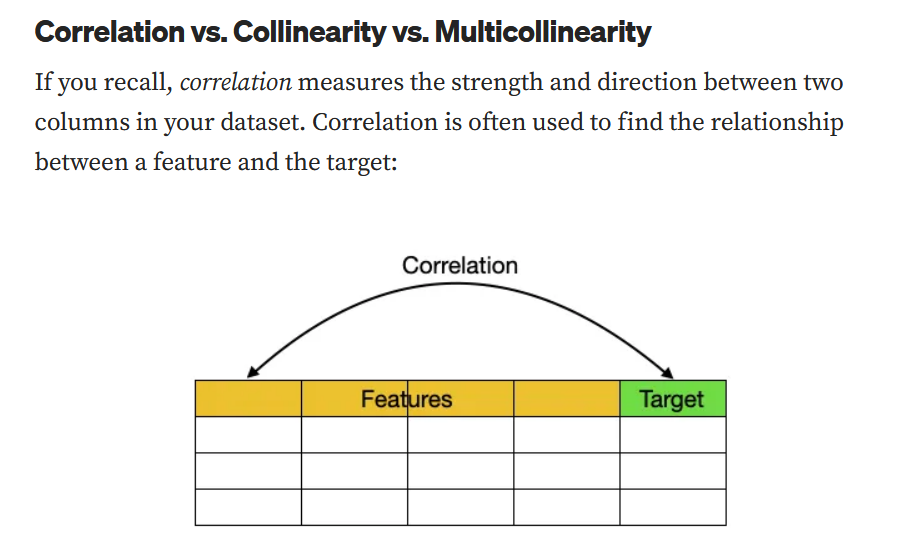

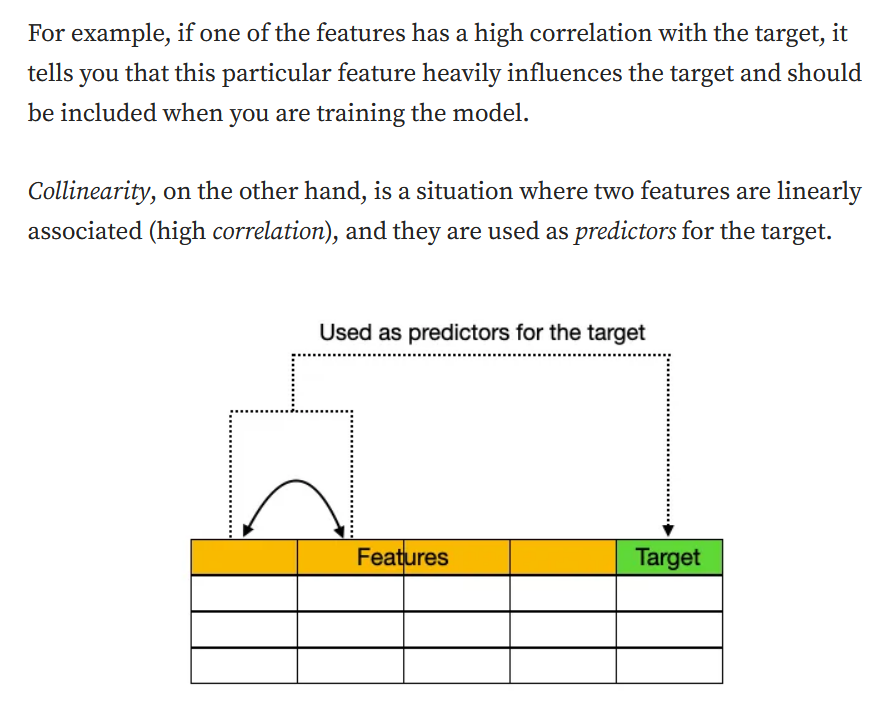

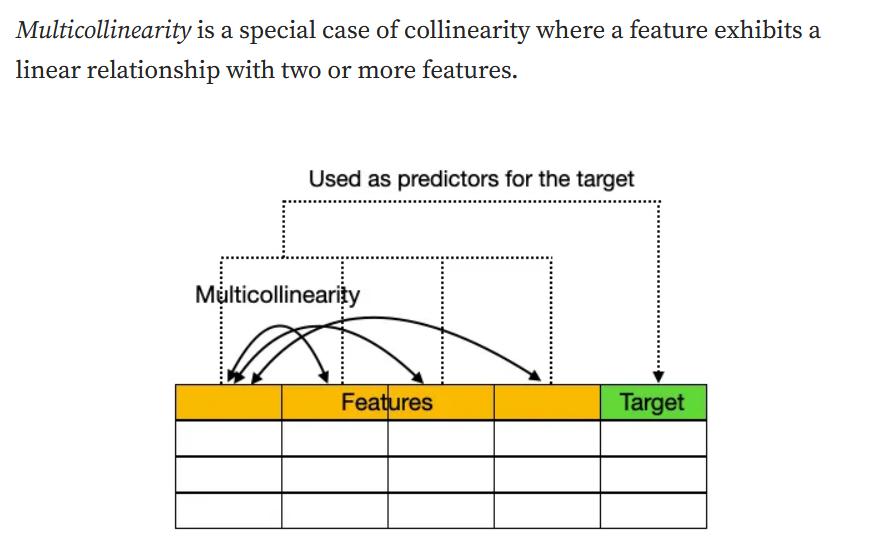

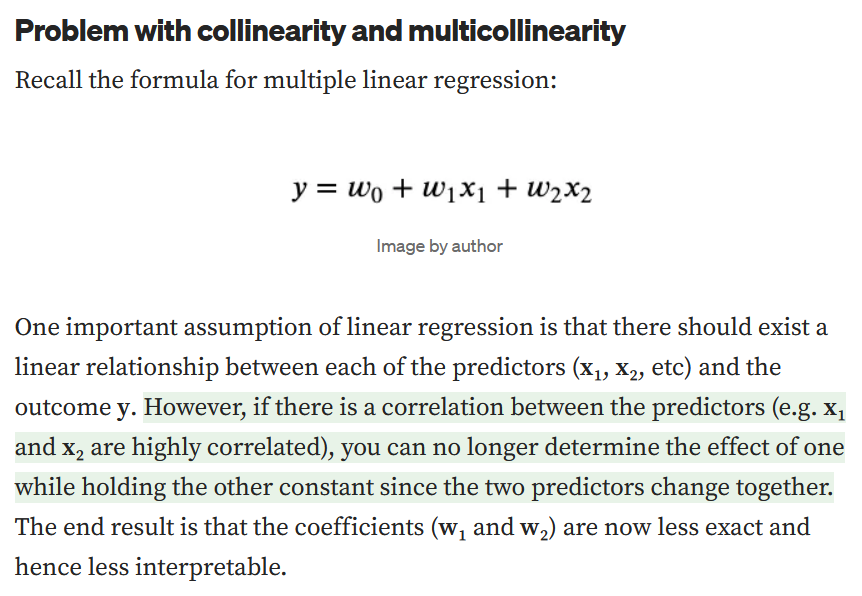

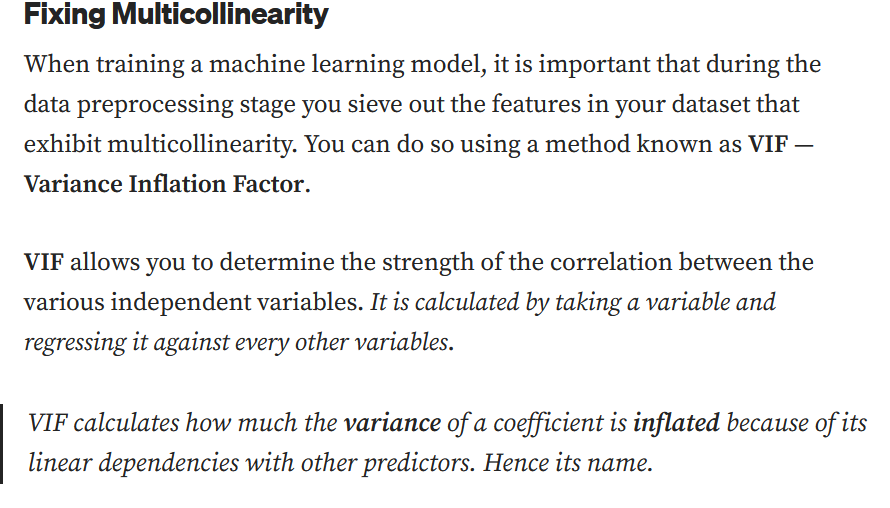

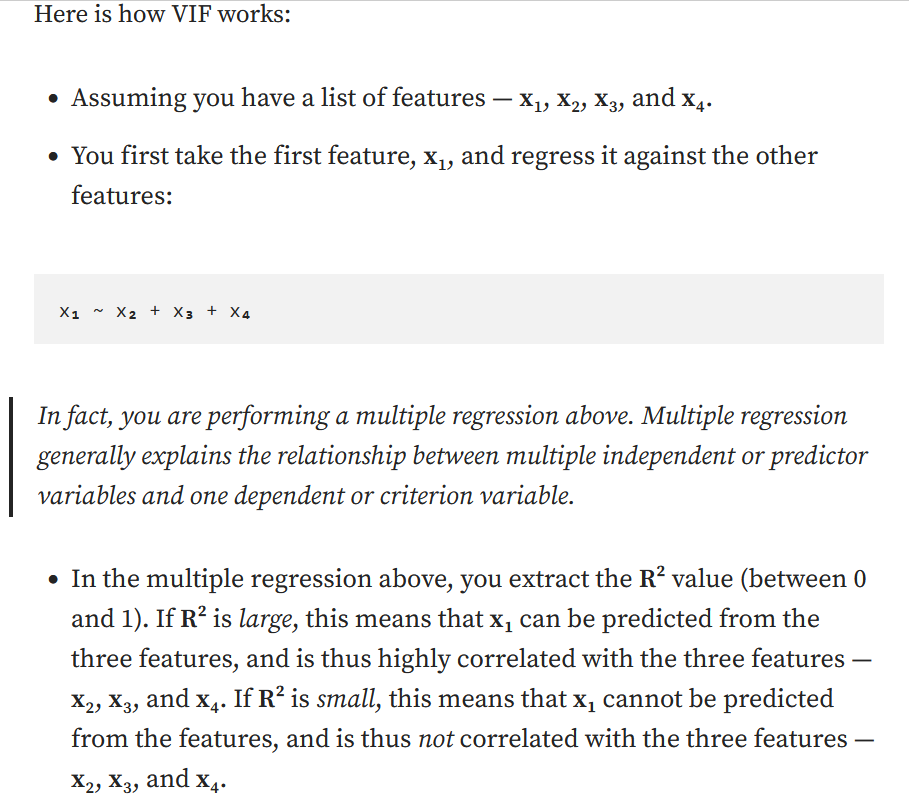

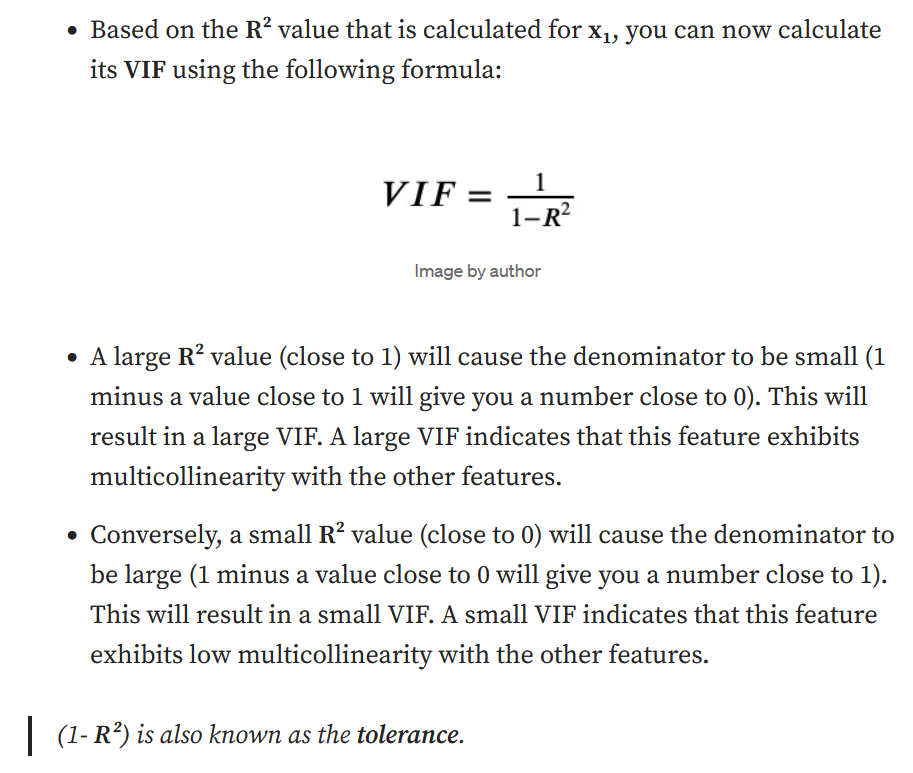

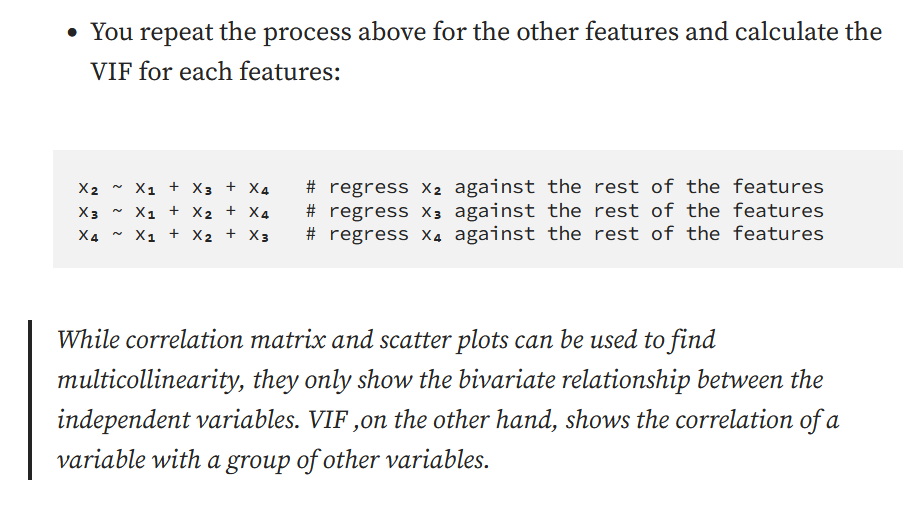

# Implementing VIF using Python

Now that you know how VIF is calculated, you can implement it using Python, with a little help from sklearn:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
calculate_vif(df=x, features=['Pclass', 'Sex', 'Age', 'SibSp',
       'Embarked'])

NameError: ignored

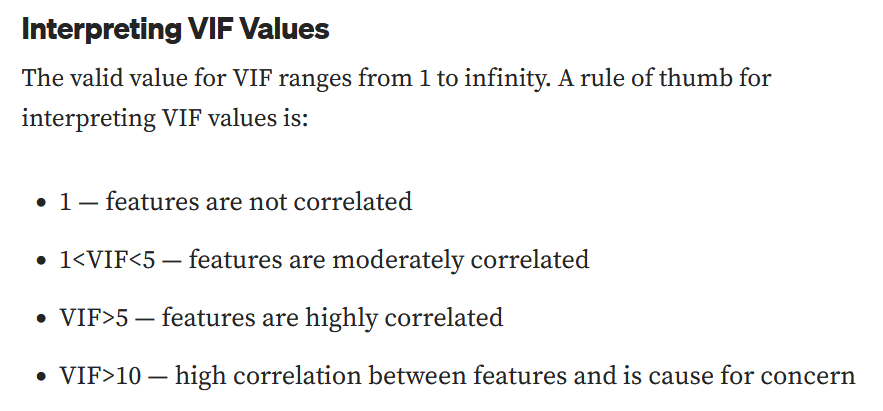

In [ ]:
# import seaborn as sns
# sns.pairplot(x.iloc[:,:7])

In [ ]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(x)
print(chi_square_value, 5*"-",p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model , " proper if <5")

In [ ]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)
#GET EIGENVALUES
ev, v  = fa.get_eigenvalues()

In [ ]:
# SCREEPLOT (need pyplot)
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. An eigenvalue of 2.5 means that the factor would explain the variance of 2.5 variables, and so on.

We will only use 2 factors here, given the big dropoff in eigenvalue after the 2rd factor. These factors have eigenvalues of 2.3, 1.75 and 1.25, meaning that they describe the variance of about 8.1 variables.

The FactorAnalyzer function is where we specify the number of factors we want as well as the type of rotation. Simply put, the idea of rotation is to rotate the factors in order to achieve a simpler and more interpretable structure. Many types of rotations exist. Below, I will use varimax rotation, which maximizes the sum of the variance of squared loadings while ensuring that the factors created are not correlated (orthogonality). Let’s see what factors are created.